In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Q4. Are there any significant differences in pickups on holidays compared to regular days?

In [11]:
uber_weather_df = pd.read_csv("Resources/clean.csv")
uber_weather_df

,pickup_date,pickup_time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01,01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01,01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01,01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01,01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2015-06-30,23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26054,2015-06-30,23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26055,2015-06-30,23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26056,2015-06-30,23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [12]:
uber_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26058 entries, 0 to 26057
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_date  26058 non-null  object 
 1   pickup_time  26058 non-null  object 
 2   borough      26058 non-null  object 
 3   pickups      26058 non-null  int64  
 4   spd          26058 non-null  float64
 5   vsb          26058 non-null  float64
 6   temp         26058 non-null  float64
 7   dewp         26058 non-null  float64
 8   slp          26058 non-null  float64
 9   pcp01        26058 non-null  float64
 10  pcp06        26058 non-null  float64
 11  pcp24        26058 non-null  float64
 12  sd           26058 non-null  float64
 13  hday         26058 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.8+ MB


In [13]:
uber_weather_df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [17]:
#GROUP THE DATA BY HOLYDAY AND REGULAR DAY
# Group the data by holiday
holiday_group = uber_weather_df[uber_weather_df['hday'] == 'Y']
holiday_group

,pickup_date,pickup_time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01,01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01,01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01,01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01,01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,2015-06-03,23:00:00,Brooklyn,947,7.0,10.0,60.0,49.0,1022.3,0.0,0.0,0.0,0.0,Y
22166,2015-06-03,23:00:00,EWR,0,7.0,10.0,60.0,49.0,1022.3,0.0,0.0,0.0,0.0,Y
22167,2015-06-03,23:00:00,Manhattan,4538,7.0,10.0,60.0,49.0,1022.3,0.0,0.0,0.0,0.0,Y
22168,2015-06-03,23:00:00,Queens,453,7.0,10.0,60.0,49.0,1022.3,0.0,0.0,0.0,0.0,Y


In [18]:
#GROUP BY REGULAR DAYS
regular_day_group = uber_weather_df[uber_weather_df['hday'] != 'Y']
regular_day_group

,pickup_date,pickup_time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
138,2015-01-02,00:00:00,Bronx,24,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
139,2015-01-02,00:00:00,Brooklyn,331,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
140,2015-01-02,00:00:00,EWR,0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
141,2015-01-02,00:00:00,Manhattan,808,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
142,2015-01-02,00:00:00,Queens,220,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2015-06-30,23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26054,2015-06-30,23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26055,2015-06-30,23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26056,2015-06-30,23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [21]:
# Calculate the mean pickups for each group
mean_pickups_holiday = holiday_group['pickups'].mean()
mean_pickups_regular = regular_day_group['pickups'].mean()
print(f'Mean Holydays {mean_pickups_holiday}')
print(f'Mean Regular Days {mean_pickups_regular}')

Mean Holydays 488.8792415169661
Mean Regular Days 549.5552362707535


In [26]:
# Perform a t-test to check for significance
from scipy import stats
#running a t-test to see significance 
t_stat, p_value = stats.ttest_ind(holiday_group['pickups'], regular_day_group['pickups'])
# Define a significance level (e.g., 0.05)
alpha = 0.05
# Compare the p-value to the significance level
if p_value < alpha:
    significance_result = "There is a significant difference"
else:
    significance_result = "There is no significant difference"
print(f"t-test value: {t_stat}") 
print(f" P Value: {p_value}")
significance_result

t-test value: -1.8157147194439063
 P Value: 0.06942563371128088


'There is no significant difference'

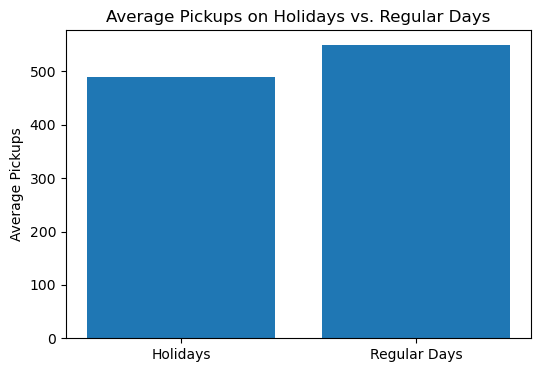

In [28]:
# Create a bar plot to visualize the comparison
plt.figure(figsize=(6, 4))
plt.bar(['Holidays', 'Regular Days'], [mean_pickups_holiday, mean_pickups_regular])
plt.title("Average Pickups on Holidays vs. Regular Days")
plt.ylabel("Average Pickups")
plt.show()


In [29]:
# Print the results
print(significance_result)
print("Mean pickups on holidays:", mean_pickups_holiday)
print("Mean pickups on regular days:", mean_pickups_regular)

There is no significant difference
Mean pickups on holidays: 488.8792415169661
Mean pickups on regular days: 549.5552362707535


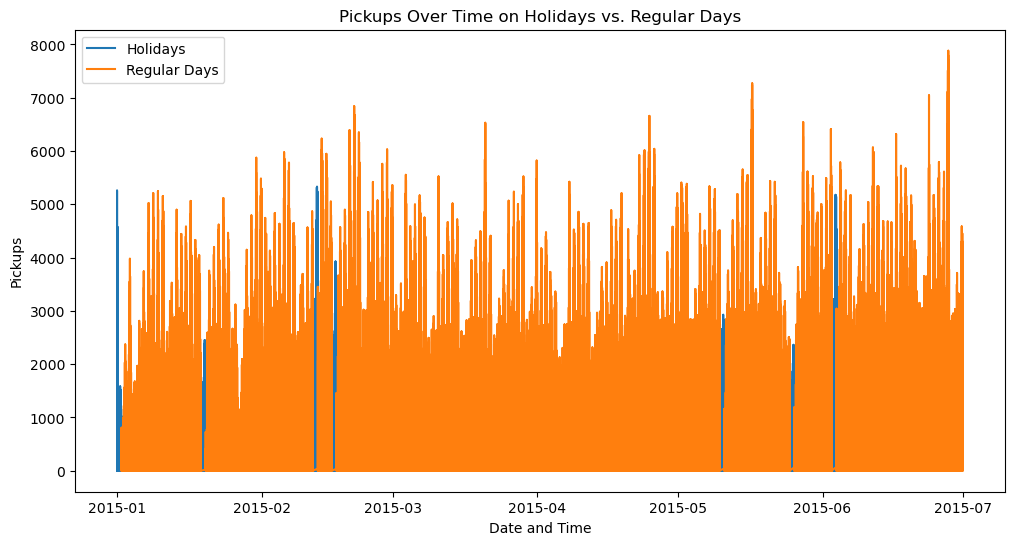

In [32]:
#Time Analysis
#this is a time series plot created by using multiple time periods, 
#This chart helps to visualize how pickups vary over time for both holidays and regular days.

uber_weather_df['pickup_datetime'] = pd.to_datetime(uber_weather_df['pickup_date'] + ' ' + uber_weather_df['pickup_time'])
plt.figure(figsize=(12, 6))
plt.plot(uber_weather_df[uber_weather_df['hday'] == 'Y']['pickup_datetime'], uber_weather_df[uber_weather_df['hday'] == 'Y']['pickups'], label='Holidays')
plt.plot(uber_weather_df[uber_weather_df['hday'] != 'Y']['pickup_datetime'], uber_weather_df[uber_weather_df['hday'] != 'Y']['pickups'], label='Regular Days')
plt.title("Pickups Over Time on Holidays vs. Regular Days")
plt.xlabel("Date and Time")
plt.ylabel("Pickups")
plt.legend()
plt.show()